In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from utils import calc_stable_rank

data = pd.read_json('stable_rank_data.json')
data

,layer 1,layer 2,layer 3,layer 4,layer 5,layer 6,layer 7,layer 8,layer 9,layer 10,...,layer 15,layer 16,layer 17,layer 18,layer 19,layer 20,layer 21,layer 22,layer 23,layer 24
rank_Wq,37.746488,47.995172,50.518861,53.671544,45.050203,58.536675,53.638019,51.167909,50.430506,49.059962,...,29.173285,16.289259,27.153553,33.286284,15.2051,15.097324,18.034815,11.538449,7.217394,3.090915
Wq_SVs,"[16.14934730529785, 11.50722885131836, 9.54026...","[11.69798469543457, 7.746462345123291, 7.60485...","[11.057973861694336, 7.353492736816406, 7.0363...","[10.510993003845215, 7.564769268035889, 7.3130...","[11.584038734436035, 7.2636494636535645, 7.102...","[10.444161415100098, 7.378078460693359, 7.2452...","[10.699041366577148, 6.926088333129883, 6.5594...","[10.923847198486328, 7.519553184509277, 6.9349...","[11.181563377380371, 7.454981327056885, 7.0746...","[11.232397079467773, 7.700602054595947, 7.2434...",...,"[14.461498260498047, 8.966386795043945, 7.0087...","[20.08649444580078, 15.006729125976562, 9.3879...","[15.067818641662598, 11.546323776245117, 9.215...","[13.039559364318848, 9.502802848815918, 6.9928...","[19.978469848632812, 16.511632919311523, 11.05...","[19.795255661010742, 12.944652557373047, 10.11...","[17.834980010986328, 14.370208740234375, 11.60...","[22.971294403076172, 16.130956649780273, 10.07...","[33.256629943847656, 21.42730712890625, 19.943...","[74.62596130371094, 35.441829681396484, 31.401..."
rank_Wk,19.673634,30.292362,36.726626,42.717251,36.867566,48.009662,42.50196,41.976398,37.716193,35.9649,...,37.850995,33.648673,34.101987,33.491577,26.489028,22.502708,25.725857,20.557693,8.90295,3.921309
Wk_SVs,"[22.36492347717285, 11.402949333190918, 9.5025...","[14.845325469970703, 7.588488578796387, 7.1128...","[12.979384422302246, 6.894356727600098, 6.2542...","[11.63990306854248, 6.484995365142822, 6.06223...","[12.640697479248047, 6.788712978363037, 6.3261...","[11.292642593383789, 6.651384353637695, 6.3990...","[11.804441452026367, 6.527894496917725, 6.1833...","[11.877958297729492, 6.665009498596191, 6.3141...","[12.776251792907715, 6.989370822906494, 6.8318...","[12.99870777130127, 7.7947235107421875, 7.2704...",...,"[12.383533477783203, 7.082401752471924, 6.7726...","[13.008391380310059, 7.120264530181885, 6.7071...","[12.760760307312012, 6.704653263092041, 6.5837...","[12.504754066467285, 6.451470851898193, 6.2521...","[13.660563468933105, 8.412981033325195, 6.5083...","[14.644611358642578, 8.7896728515625, 6.406551...","[13.498784065246582, 8.198092460632324, 7.0311...","[15.34562873840332, 9.610943794250488, 6.65268...","[24.624692916870117, 10.716960906982422, 6.632...","[44.61764907836914, 10.221203804016113, 8.1025..."
rank_Wv,153.928797,144.28429,196.207468,173.041136,177.458682,153.94657,162.988347,150.323667,148.750311,155.650452,...,307.226075,342.661621,361.36586,359.130686,254.066123,254.147823,249.61186,320.091048,270.543452,177.910433
Wv_SVs,"[4.496787548065185, 3.704492568969726, 3.38340...","[3.104835271835327, 2.72252345085144, 2.687050...","[3.344300270080566, 3.256203413009643, 3.13221...","[3.90455412864685, 3.859256744384765, 3.687398...","[4.203754425048828, 4.125836372375488, 4.08276...","[4.519914150238037, 4.435717105865478, 4.29223...","[4.559813022613525, 4.468112468719482, 4.41104...","[4.942178249359131, 4.755751609802246, 4.72799...","[5.046658515930176, 4.917182445526123, 4.75679...","[5.074046611785889, 4.91614294052124, 4.853044...",...,"[3.796254634857177, 3.623931884765625, 3.57641...","[3.475069522857666, 3.375602006912231, 3.30065...","[3.584717035293579, 3.508929491043091, 3.49507...","[3.587399005889892, 3.463163137435913, 3.38966...","[4.324838638305664, 4.2510175704956055, 4.2165...","[4.353453636169434, 4.302163124084473, 4.28290...","[4.4972991943359375, 4.379304885864258, 4.3576...","[3.850598096847534, 3.820495843887329, 3.78940...","[3.988134384155273, 3.56554102897644, 3.449174...","[4.090197563171387, 2.730780601501465, 2.62520..."
rank_WqWkT,2.353477,3.058692,

In [3]:
# data lists:
layer_num = [i for i in range(1,25)]
ranks_Wq = [data[layer]['rank_Wq'] for layer in data]
ranks_Wk = [data[layer]['rank_Wk'] for layer in data]
ranks_Wv = [data[layer]['rank_Wv'] for layer in data]
ranks_WqWkT = [data[layer]['rank_WqWkT'] for layer in data]

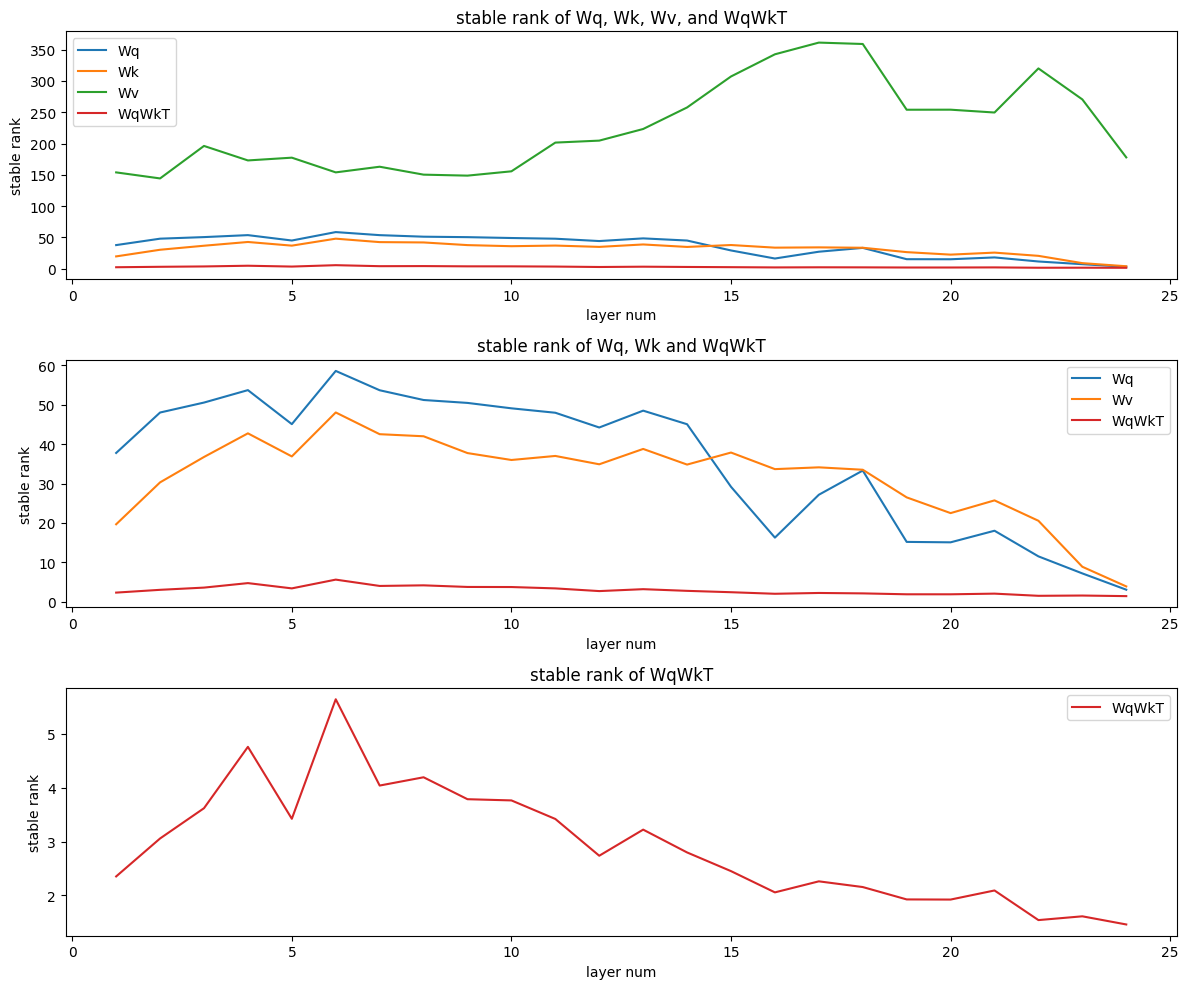

In [4]:
# plots:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12,10))
blue, orange, green, red = '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'
axes[0].set(title='stable rank of Wq, Wk, Wv, and WqWkT', xlabel='layer num', ylabel='stable rank')
axes[0].plot(layer_num, ranks_Wq, label='Wq', c=blue)
axes[0].plot(layer_num, ranks_Wk, label='Wk', c=orange)
axes[0].plot(layer_num, ranks_Wv, label='Wv', c=green)
axes[0].plot(layer_num, ranks_WqWkT, label='WqWkT', c=red)
axes[0].legend()

axes[1].set(title='stable rank of Wq, Wk and WqWkT', xlabel='layer num', ylabel='stable rank')
axes[1].plot(layer_num, ranks_Wq, label='Wq', c=blue)
axes[1].plot(layer_num, ranks_Wk, label='Wv', c=orange)
axes[1].plot(layer_num, ranks_WqWkT, label='WqWkT', c=red)
axes[1].legend()

axes[2].set(title='stable rank of WqWkT', xlabel='layer num', ylabel='stable rank')
axes[2].plot(layer_num, ranks_WqWkT, label='WqWkT', c=red)
axes[2].legend()

plt.tight_layout()


In [5]:
# references:

torch.set_printoptions(edgeitems=4, sci_mode=False, linewidth=200)
rand_W = nn.Linear(2048, 2048)
# print(rand_W.weight)

random_stable_r = calc_stable_rank(rand_W.weight)
identity_W = torch.eye(2048)
identity_stable_r = calc_stable_rank(identity_W)
print(f'identity stable rank: {identity_stable_r[0]}')
print(f'randomly init layer stable rank: {random_stable_r[0]}')

# shows magnitude wont matter, which it shouldnt:
print(f'identity * 10 stable rank(sanity check): {calc_stable_rank(identity_W*10)[0]}')

# try some other controls? like dot some other matricies that dont make sense just to see what happens.

# question: does WqT get same result as Wq?

# test with matrix that is the same initialization as phi was?

# analyze the size of the biggest singular value for every layer?

identity stable rank: 2048.0
randomly init layer stable rank: 509.8250123604268
identity * 10 stable rank(sanity check): 2048.0


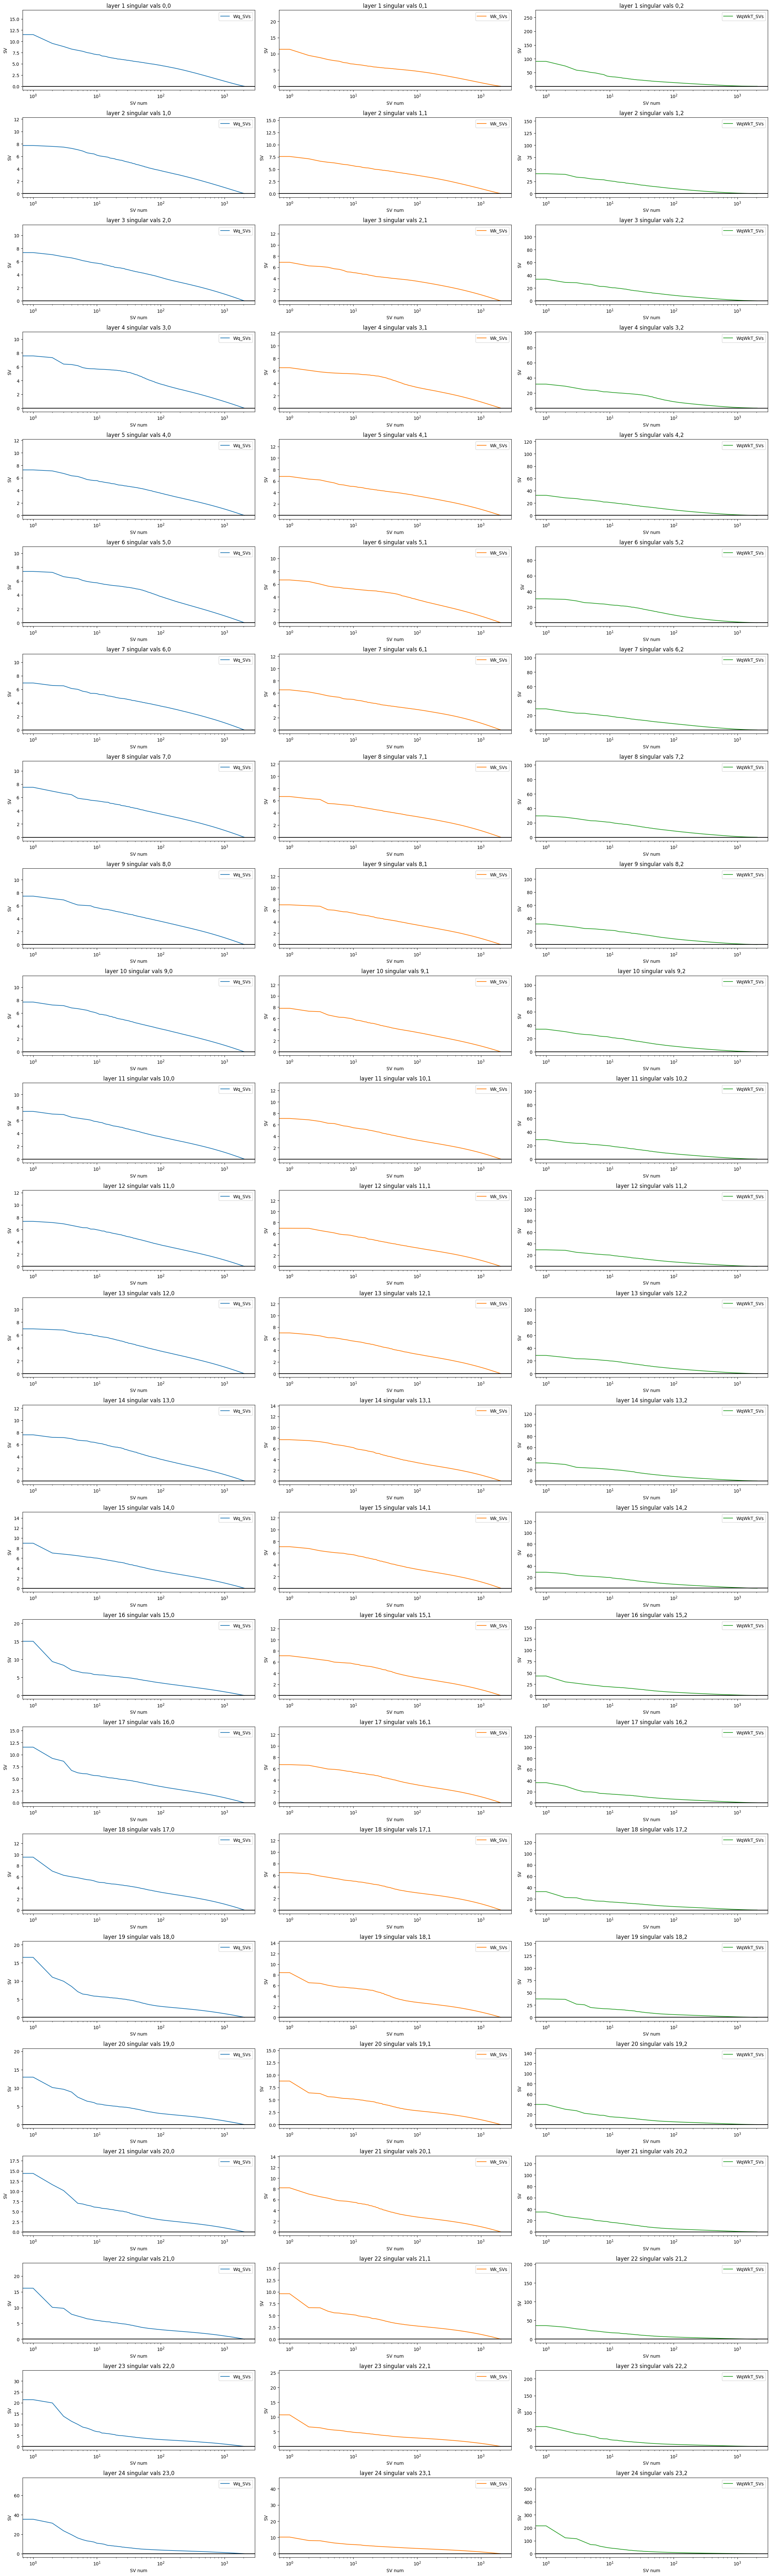

In [26]:
nrows, ncols = 24, 3
fig2, axes2 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24,80))
cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
# W_names = ['Wq_SVs', 'Wk_SVs', 'Wv_SVs', 'WqWkT_SVs']
W_names = ['Wq_SVs', 'Wk_SVs', 'WqWkT_SVs']
x = [i for i in range(2048)]
for row in range(nrows):
    for col in range(ncols):
        axes2[row,col].set(title=f'layer {row+1} singular vals {row},{col}', xlabel='SV num', ylabel='SV')
        SVs = data[f'layer {row+1}'][W_names[col]]
        axes2[row,col].semilogx(x, SVs, label=W_names[col], c=cs[col])
        axes2[row,col].legend()
        axes2[row,col].axhline(y=0, c='k')
plt.tight_layout()

# look at the first 100 SVs? to get better graphs

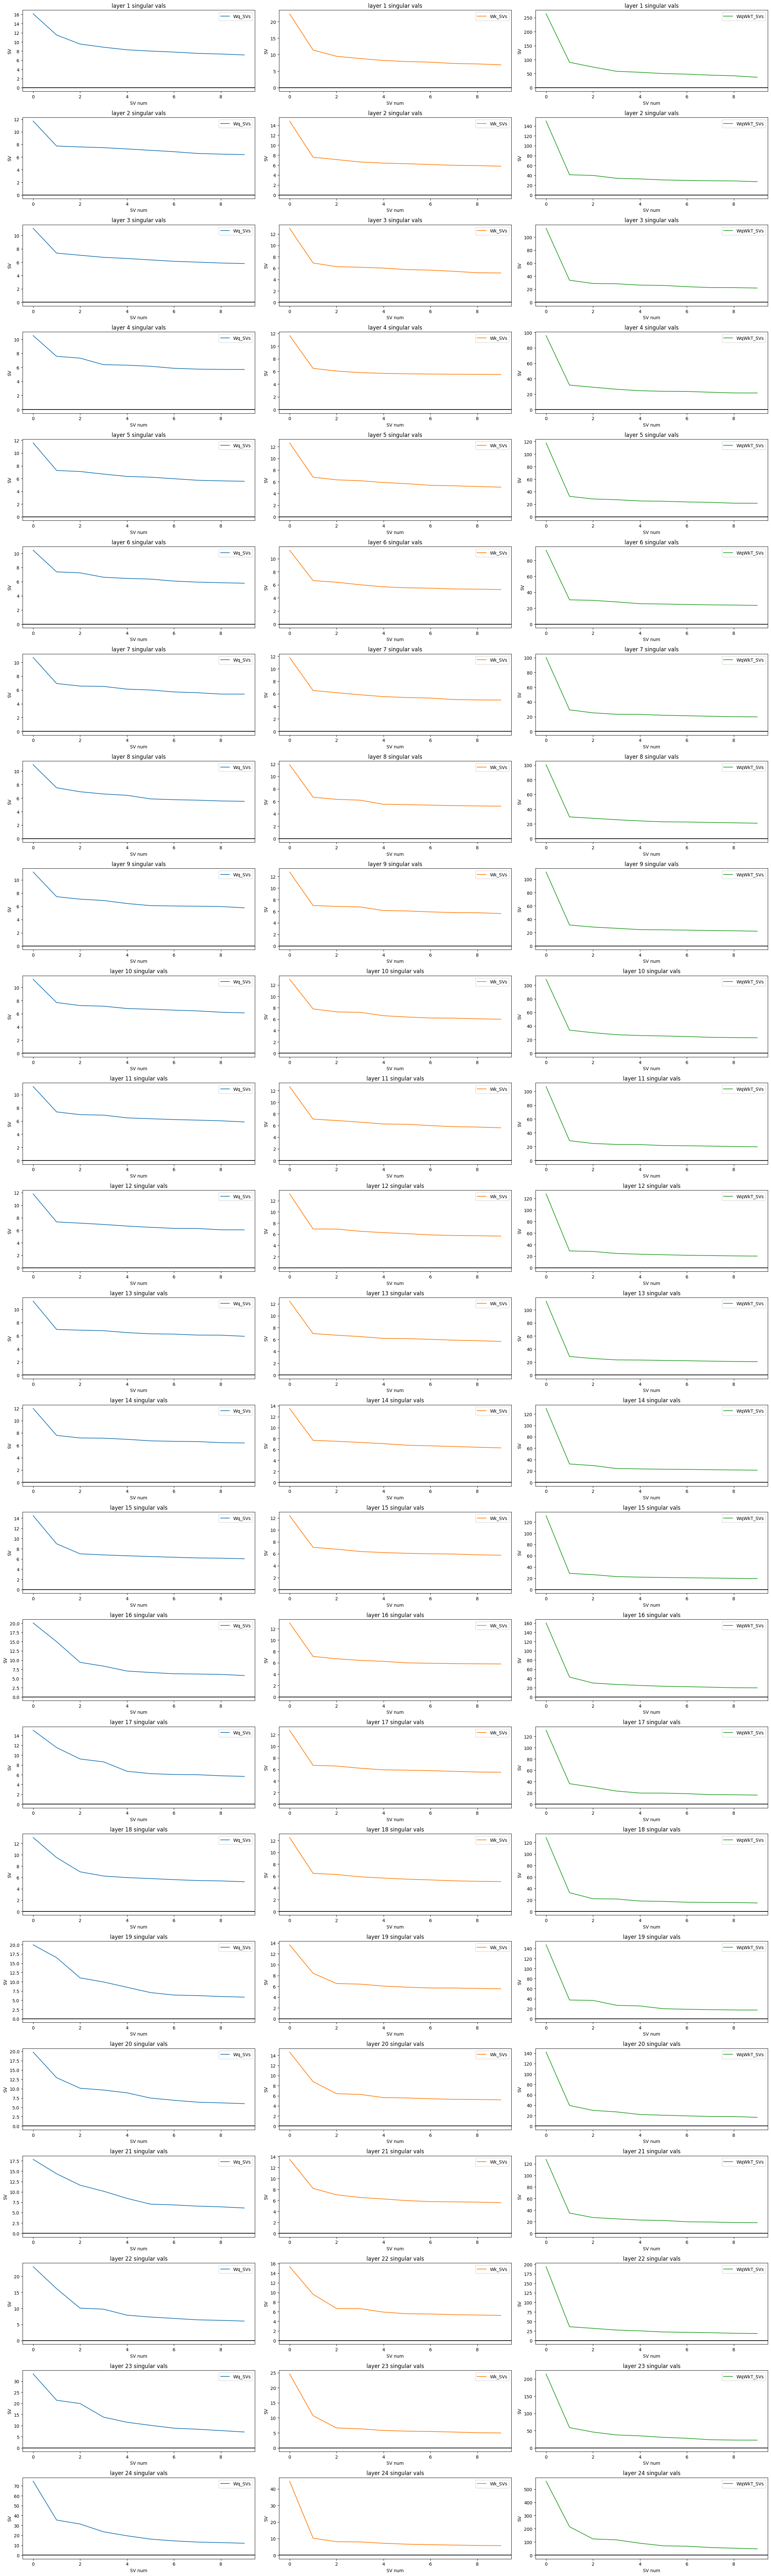

In [25]:
# with a different num of SVs included:
numvals = 10
nrows, ncols = 24, 3
fig3, axes3 = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24,80))
cs = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
# W_names = ['Wq_SVs', 'Wk_SVs', 'Wv_SVs', 'WqWkT_SVs']
W_names = ['Wq_SVs', 'Wk_SVs', 'WqWkT_SVs']

x = [i for i in range(2048)]
for row in range(nrows):
    for col in range(ncols):
        axes3[row,col].set(title=f'layer {row+1} singular vals', xlabel='SV num', ylabel='SV')
        SVs = data[f'layer {row+1}'][W_names[col]][:numvals]
        axes3[row,col].plot(x[:numvals], SVs, label=W_names[col], c=cs[col])
        axes3[row,col].legend()
        axes3[row,col].axhline(y=0, c='k')
plt.tight_layout()

# normalize the SV's for the graphs? so that we can see better?